In [133]:
import pandas as pd
import seaborn as sns

In [93]:
df = pd.read_csv('data/Online Sales Data.csv')
df.head()

Transaction ID        Date Product Category             Product Name  \
0           10001  2024-01-01      Electronics            iPhone 14 Pro   
1           10002  2024-01-02  Home Appliances         Dyson V11 Vacuum   
2           10003  2024-01-03         Clothing         Levi's 501 Jeans   
3           10004  2024-01-04            Books        The Da Vinci Code   
4           10005  2024-01-05  Beauty Products  Neutrogena Skincare Set   

   Units Sold  Unit Price  Total Revenue         Region Payment Method  
0           2      999.99        1999.98  North America    Credit Card  
1           1      499.99         499.99         Europe         PayPal  
2           3       69.99         209.97           Asia     Debit Card  
3           4       15.99          63.96  North America    Credit Card  
4           1       89.99          89.99         Europe         PayPal

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [95]:
#date handling
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_name'] = df['Date'].dt.day_name()
df.head()

Transaction ID       Date Product Category             Product Name  \
0           10001 2024-01-01      Electronics            iPhone 14 Pro   
1           10002 2024-01-02  Home Appliances         Dyson V11 Vacuum   
2           10003 2024-01-03         Clothing         Levi's 501 Jeans   
3           10004 2024-01-04            Books        The Da Vinci Code   
4           10005 2024-01-05  Beauty Products  Neutrogena Skincare Set   

   Units Sold  Unit Price  Total Revenue         Region Payment Method  year  \
0           2      999.99        1999.98  North America    Credit Card  2024   
1           1      499.99         499.99         Europe         PayPal  2024   
2           3       69.99         209.97           Asia     Debit Card  2024   
3           4       15.99          63.96  North America    Credit Card  2024   
4           1       89.99          89.99         Europe         PayPal  2024   

   month  day   day_name  
0      1    1     Monday  
1      1    2    Tuesday  
2      1    3  Wednesday  
3      1    4   Thursday  
4      1    5     Friday

In [96]:
df.drop_duplicates(inplace=True)

In [97]:
df.drop('Transaction ID', axis="columns", inplace=True)
df.head()

Date Product Category             Product Name  Units Sold  \
0 2024-01-01      Electronics            iPhone 14 Pro           2   
1 2024-01-02  Home Appliances         Dyson V11 Vacuum           1   
2 2024-01-03         Clothing         Levi's 501 Jeans           3   
3 2024-01-04            Books        The Da Vinci Code           4   
4 2024-01-05  Beauty Products  Neutrogena Skincare Set           1   

   Unit Price  Total Revenue         Region Payment Method  year  month  day  \
0      999.99        1999.98  North America    Credit Card  2024      1    1   
1      499.99         499.99         Europe         PayPal  2024      1    2   
2       69.99         209.97           Asia     Debit Card  2024      1    3   
3       15.99          63.96  North America    Credit Card  2024      1    4   
4       89.99          89.99         Europe         PayPal  2024      1    5   

    day_name  
0     Monday  
1    Tuesday  
2  Wednesday  
3   Thursday  
4     Friday

In [98]:
print("Categories are", df['Product Category'].value_counts().count())
category_counts = df['Product Category'].value_counts()

Categories are 6


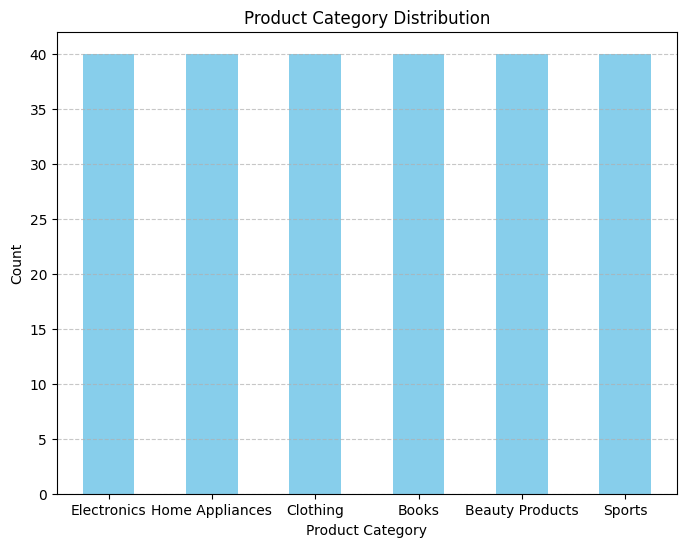

In [99]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color= 'skyblue')
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [100]:
df['Product Name'].value_counts().count()

np.int64(232)

In [101]:
df['Product Name'].describe()

count                             240
unique                            232
top       Dyson Supersonic Hair Dryer
freq                                2
Name: Product Name, dtype: object

In [102]:
df['Payment Method'].value_counts()

Payment Method
Credit Card    120
PayPal          80
Debit Card      40
Name: count, dtype: int64

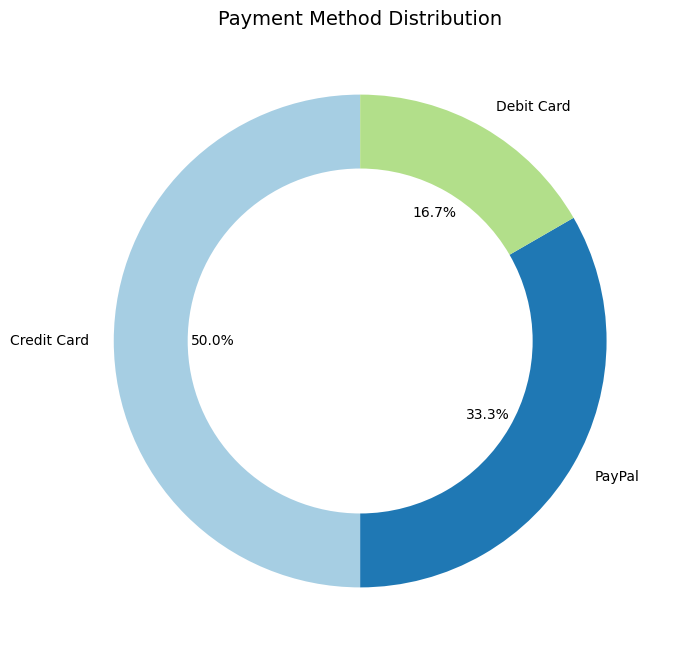

In [103]:
payment_counts = df['Payment Method'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=plt.cm.Paired.colors, wedgeprops={'width': 0.3})

plt.title('Payment Method Distribution', fontsize=14)
plt.show()

In [104]:
df['Region'].value_counts()

Region
North America    80
Europe           80
Asia             80
Name: count, dtype: int64

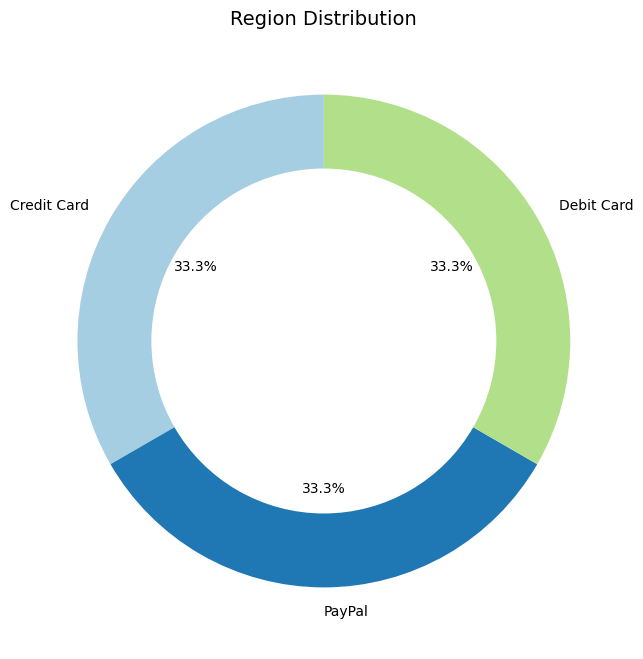

In [105]:
region_counts = df['Region'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=plt.cm.Paired.colors, wedgeprops={'width': 0.3})

plt.title('Region Distribution', fontsize=14)
plt.show()

In [106]:
df['Product Category'].unique()

array(['Electronics', 'Home Appliances', 'Clothing', 'Books',
       'Beauty Products', 'Sports'], dtype=object)

In [107]:
df[df['Product Category'] == 'Electronics']['Product Name']

0                                    iPhone 14 Pro
6                              MacBook Pro 16-inch
12                           Samsung Galaxy Tab S8
18                           Garmin Forerunner 945
24                 Bose QuietComfort 35 Headphones
30                      Sony WH-1000XM4 Headphones
36                            Apple Watch Series 8
42                              GoPro HERO10 Black
48                               Kindle Paperwhite
54                Anker PowerCore Portable Charger
60                                 Nintendo Switch
66                              Samsung QLED 4K TV
72                          HP Spectre x360 Laptop
78                               Apple AirPods Pro
84                             Ring Video Doorbell
90                      Logitech MX Master 3 Mouse
96                 Bose SoundLink Revolve+ Speaker
102                            Canon EOS R5 Camera
108                            Google Nest Hub Max
114                            

In [108]:
df[df['Product Category'] == 'Home Appliances']['Product Name']

1                                     Dyson V11 Vacuum
7                                 Blueair Classic 480i
13                         Keurig K-Elite Coffee Maker
19                          Ninja Professional Blender
25                       Panasonic NN-SN966S Microwave
31                                     Instant Pot Duo
37                                          Roomba i7+
43                                Nespresso VertuoPlus
49                                 Breville Smart Oven
55                      KitchenAid Artisan Stand Mixer
61                                Philips Airfryer XXL
67                                    Eufy RoboVac 11S
73                De'Longhi Magnifica Espresso Machine
79                                Dyson Pure Cool Link
85                                          LG OLED TV
91                               Instant Pot Duo Crisp
97                           Vitamix Explorian Blender
103                              Shark IQ Robot Vacuum
109       

In [109]:
df[df['Product Category'] == 'Clothing']['Product Name']

2                                   Levi's 501 Jeans
8                                   Nike Air Force 1
14                            North Face Down Jacket
20                                 Zara Summer Dress
26                           Adidas Ultraboost Shoes
32                     Under Armour HeatGear T-Shirt
38                            Columbia Fleece Jacket
44                          Patagonia Better Sweater
50                        Ray-Ban Aviator Sunglasses
56                         Calvin Klein Boxer Briefs
62                         Hanes ComfortSoft T-Shirt
68                       Puma Suede Classic Sneakers
74                         Tommy Hilfiger Polo Shirt
80                             Levi's Trucker Jacket
86                    Uniqlo Ultra Light Down Jacket
92               Adidas Originals Superstar Sneakers
98                    Gap Essential Crewneck T-Shirt
104                               H&M Slim Fit Jeans
110                     Old Navy Relaxed-Fit T

In [110]:
df[df['Product Category'] == 'Books']['Product Name']

3                                      The Da Vinci Code
9                                  Dune by Frank Herbert
15                 Salt, Fat, Acid, Heat by Samin Nosrat
21                            Gone Girl by Gillian Flynn
27                    Pride and Prejudice by Jane Austen
33                                 1984 by George Orwell
39                 Harry Potter and the Sorcerer's Stone
45                            Becoming by Michelle Obama
51                The Silent Patient by Alex Michaelides
57                             Educated by Tara Westover
63                Where the Crawdads Sing by Delia Owens
69               The Great Gatsby by F. Scott Fitzgerald
75                   To Kill a Mockingbird by Harper Lee
81                          The Hobbit by J.R.R. Tolkien
87               The Catcher in the Rye by J.D. Salinger
93                         The Alchemist by Paulo Coelho
99                     The Power of Now by Eckhart Tolle
105               The Girl on t

In [111]:
df[df['Product Category'] == 'Beauty Products']['Product Name']

4                                Neutrogena Skincare Set
10                                  Chanel No. 5 Perfume
16                           Dyson Supersonic Hair Dryer
22                            Olay Regenerist Face Cream
28                                 MAC Ruby Woo Lipstick
34                              L'Oreal Revitalift Serum
40                    Estee Lauder Advanced Night Repair
46                               Clinique Moisture Surge
52                       Shiseido Ultimate Sun Protector
58                      Anastasia Beverly Hills Brow Wiz
64                              Lancome La Vie Est Belle
70                      Drunk Elephant C-Firma Day Serum
76                                     Glossier Boy Brow
82                         Charlotte Tilbury Magic Cream
88                               Sunday Riley Good Genes
94                                Tatcha The Water Cream
100                Kiehl's Midnight Recovery Concentrate
106                       The O

In [112]:
df[df['Product Category'] == 'Books']['Product Name']


3                                      The Da Vinci Code
9                                  Dune by Frank Herbert
15                 Salt, Fat, Acid, Heat by Samin Nosrat
21                            Gone Girl by Gillian Flynn
27                    Pride and Prejudice by Jane Austen
33                                 1984 by George Orwell
39                 Harry Potter and the Sorcerer's Stone
45                            Becoming by Michelle Obama
51                The Silent Patient by Alex Michaelides
57                             Educated by Tara Westover
63                Where the Crawdads Sing by Delia Owens
69               The Great Gatsby by F. Scott Fitzgerald
75                   To Kill a Mockingbird by Harper Lee
81                          The Hobbit by J.R.R. Tolkien
87               The Catcher in the Rye by J.D. Salinger
93                         The Alchemist by Paulo Coelho
99                     The Power of Now by Eckhart Tolle
105               The Girl on t

In [113]:
#sales_per_regions
sales_by_region = df.groupby("Region")["Units Sold"].sum()
print(sales_by_region)

Region
Asia             233
Europe           105
North America    180
Name: Units Sold, dtype: int64


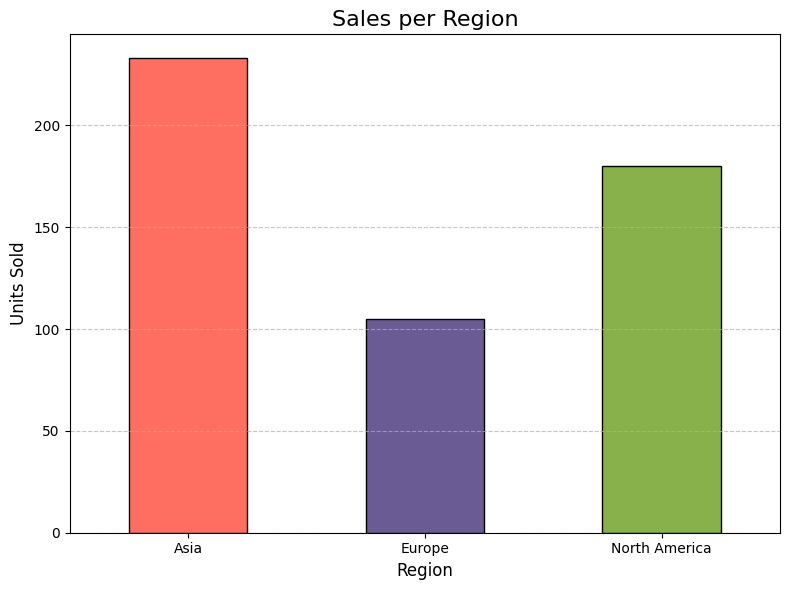

In [114]:
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9']
plt.figure(figsize=(8, 6))
sales_by_region.plot(kind='bar', color=colors, edgecolor='black')

plt.title('Sales per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [115]:
#sales_by_categories
sales_by_categories = df.groupby("Product Category")["Units Sold"].sum()
print(sales_by_categories)

Product Category
Beauty Products     46
Books              114
Clothing           145
Electronics         66
Home Appliances     59
Sports              88
Name: Units Sold, dtype: int64


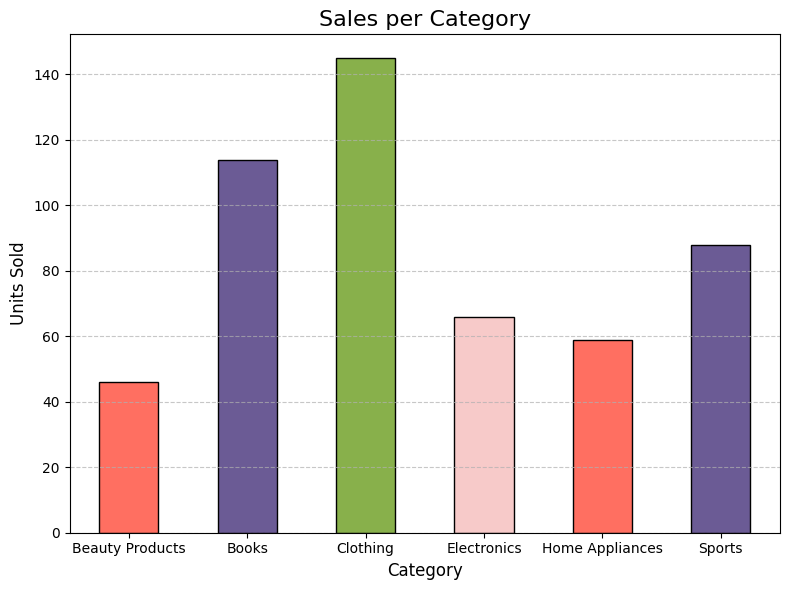

In [116]:
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9']


plt.figure(figsize=(8, 6))
sales_by_categories.plot(kind='bar', color=colors, edgecolor='black')

plt.title('Sales per Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [117]:
#sales_by_Payment_methods
sales_by_payment_methods = df.groupby("Payment Method")["Units Sold"].sum()
print(sales_by_payment_methods)

Payment Method
Credit Card    268
Debit Card     145
PayPal         105
Name: Units Sold, dtype: int64


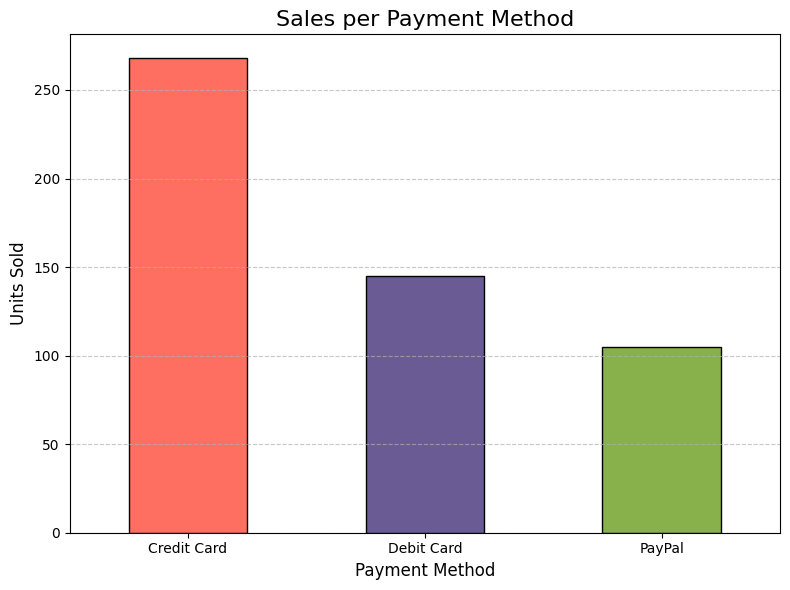

In [118]:
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9']

plt.figure(figsize=(8, 6))
sales_by_payment_methods.plot(kind='bar', color=colors, edgecolor='black')

plt.title('Sales per Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [119]:
df[df["Units Sold"] == df["Units Sold"].max()]

Date Product Category               Product Name  Units Sold  \
62 2024-03-03         Clothing  Hanes ComfortSoft T-Shirt          10   

    Unit Price  Total Revenue Region Payment Method  year  month  day day_name  
62        9.99           99.9   Asia     Debit Card  2024      3    3   Sunday

In [120]:
df[df["Units Sold"] == df["Units Sold"].min()]

Date Product Category  \
1   2024-01-02  Home Appliances   
4   2024-01-05  Beauty Products   
6   2024-01-07      Electronics   
10  2024-01-11  Beauty Products   
13  2024-01-14  Home Appliances   
..         ...              ...   
229 2024-08-17  Home Appliances   
232 2024-08-20  Beauty Products   
234 2024-08-22      Electronics   
235 2024-08-23  Home Appliances   
238 2024-08-26  Beauty Products   

                                        Product Name  Units Sold  Unit Price  \
1                                   Dyson V11 Vacuum           1      499.99   
4                            Neutrogena Skincare Set           1       89.99   
6                                MacBook Pro 16-inch           1     2499.99   
10                              Chanel No. 5 Perfume           1      129.99   
13                       Keurig K-Elite Coffee Maker           1      189.99   
..                                               ...         ...         ...   
229                             Anova Precision Oven           1      599.00   
232                        Fresh Sugar Lip Treatment           1       24.00   
234      Bose QuietComfort 35 II Wireless Headphones           1      299.00   
235  Nespresso Vertuo Next Coffee and Espresso Maker           1      159.99   
238             Sunday Riley Luna Sleeping Night Oil           1       55.00   

     Total Revenue         Region Payment Method  year  month  day  day_name  
1           499.99         Europe         PayPal  2024      1    2   Tuesday  
4            89.99         Europe         PayPal  2024      1    5    Friday  
6          2499.99  North America    Credit Card  2024      1    7    Sunday  
10          129.99         Europe         PayPal  2024      1   11  Thursday  
13          189.99         Europe         PayPal  2024      1   14    Sunday  
..             ...            ...            ...   ...    ...  ...       ...  
229         599.00         Europe         PayPal  2024      8   17  Saturday  
232          24.00         Europe         PayPal  2024      8   20   Tuesday  
234         299.00  North America    Credit Card  2024      8   22  Thursday  
235         159.99         Europe         PayPal  2024      8   23    Friday  
238          55.00         Europe         PayPal  2024      8   26    Monday  

[97 rows x 12 columns]

In [121]:
electronics = df[df['Product Category'] == 'Electronics']
electronics

Date Product Category                                 Product Name  \
0   2024-01-01      Electronics                                iPhone 14 Pro   
6   2024-01-07      Electronics                          MacBook Pro 16-inch   
12  2024-01-13      Electronics                        Samsung Galaxy Tab S8   
18  2024-01-19      Electronics                        Garmin Forerunner 945   
24  2024-01-25      Electronics              Bose QuietComfort 35 Headphones   
30  2024-01-31      Electronics                   Sony WH-1000XM4 Headphones   
36  2024-02-06      Electronics                         Apple Watch Series 8   
42  2024-02-12      Electronics                           GoPro HERO10 Black   
48  2024-02-18      Electronics                            Kindle Paperwhite   
54  2024-02-24      Electronics             Anker PowerCore Portable Charger   
60  2024-03-01      Electronics                              Nintendo Switch   
66  2024-03-07      Electronics                           Samsung QLED 4K TV   
72  2024-03-13      Electronics                       HP Spectre x360 Laptop   
78  2024-03-19      Electronics                            Apple AirPods Pro   
84  2024-03-25      Electronics                          Ring Video Doorbell   
90  2024-03-31      Electronics                   Logitech MX Master 3 Mouse   
96  2024-04-06      Electronics              Bose SoundLink Revolve+ Speaker   
102 2024-04-12      Electronics                          Canon EOS R5 Camera   
108 2024-04-18      Electronics                          Google Nest Hub Max   
114 2024-04-24      Electronics                          Amazon Echo Show 10   
120 2024-04-30      Electronics                               Apple iPad Air   
126 2024-05-06      Electronics                           Sony PlayStation 5   
132 2024-05-12      Electronics                   Microsoft Surface Laptop 4   
138 2024-05-18      Electronics            Samsung Odyssey G9 Gaming Monitor   
144 2024-05-24      Electronics                            Apple AirPods Max   
150 2024-05-30      Electronics                   Sony WH-1000XM4 Headphones   
156 2024-06-05      Electronics                           Google Pixel 6 Pro   
162 2024-06-11      Electronics                            Apple MacBook Air   
168 2024-06-17      Electronics            Samsung Odyssey G7 Gaming Monitor   
174 2024-06-23      Electronics                      Amazon Fire TV Stick 4K   
180 2024-06-29      Electronics                          Google Pixelbook Go   
186 2024-07-05      Electronics                          Sonos Beam Soundbar   
192 2024-07-11      Electronics     Logitech G Pro X Wireless Gaming Headset   
198 2024-07-17      Electronics                                  Apple TV 4K   
204 2024-07-23      Electronics                       Samsung Galaxy Watch 4   
210 2024-07-29      Electronics              Canon EOS Rebel T7i DSLR Camera   
216 2024-08-04      Electronics                    Apple MacBook Pro 16-inch   
222 2024-08-10      Electronics                    Amazon Echo Dot (4th Gen)   
228 2024-08-16      Electronics                      Google Nest Wifi Router   
234 2024-08-22      Electronics  Bose QuietComfort 35 II Wireless Headphones   

     Units Sold  Unit Price  Total Revenue         Region Payment Method  \
0             2      999.99        1999.98  North America    Credit Card   
6             1     2499.99        2499.99  North America    Credit Card   
12            2      749.99        1499.98  North America    Credit Card   
18            2      499.99         999.98  North America    Credit Card   
24            1      299.99         299.99  North America    Credit Card   
30            2      349.99         699.98  North America    Credit Card   
36            3      399.99        1199.97  North America    Credit Card   
42            3      399.99        1199.97  North America    Credit Card   
48            2      129.99         259.98  N

In [122]:
electronics_units =electronics.groupby('Product Name')['Units Sold'].sum().sort_values(ascending=False).reset_index()
electronics_units

Product Name  Units Sold
0                     Amazon Echo Dot (4th Gen)           4
1              Anker PowerCore Portable Charger           4
2                       Amazon Fire TV Stick 4K           3
3                               Nintendo Switch           3
4                            GoPro HERO10 Black           3
5               Bose SoundLink Revolve+ Speaker           3
6                          Apple Watch Series 8           3
7                    Sony WH-1000XM4 Headphones           3
8                         Samsung Galaxy Tab S8           2
9                    Logitech MX Master 3 Mouse           2
10                            Apple AirPods Pro           2
11                            Kindle Paperwhite           2
12                          Google Nest Hub Max           2
13                        Garmin Forerunner 945           2
14                               Apple iPad Air           2
15                                  Apple TV 4K           2
16                                iPhone 14 Pro           2
17                          Amazon Echo Show 10           1
18                            Apple AirPods Max           1
19                            Apple MacBook Air           1
20  Bose QuietComfort 35 II Wireless Headphones           1
21                          Canon EOS R5 Camera           1
22                    Apple MacBook Pro 16-inch           1
23                       HP Spectre x360 Laptop           1
24                          Google Pixelbook Go           1
25                           Google Pixel 6 Pro           1
26                      Google Nest Wifi Router           1
27              Canon EOS Rebel T7i DSLR Camera           1
28              Bose QuietComfort 35 Headphones           1
29                          MacBook Pro 16-inch           1
30     Logitech G Pro X Wireless Gaming Headset           1
31                          Ring Video Doorbell           1
32                   Microsoft Surface Laptop 4           1
33                       Samsung Galaxy Watch 4           1
34            Samsung Odyssey G7 Gaming Monitor           1
35                           Samsung QLED 4K TV           1
36            Samsung Odyssey G9 Gaming Monitor           1
37                           Sony PlayStation 5           1
38                          Sonos Beam Soundbar           1

In [123]:
electronics[electronics["Units Sold"].isin(electronics_units["Units Sold"].nlargest(7))]

Date Product Category                      Product Name  Units Sold  \
36  2024-02-06      Electronics              Apple Watch Series 8           3   
42  2024-02-12      Electronics                GoPro HERO10 Black           3   
54  2024-02-24      Electronics  Anker PowerCore Portable Charger           4   
60  2024-03-01      Electronics                   Nintendo Switch           3   
96  2024-04-06      Electronics   Bose SoundLink Revolve+ Speaker           3   
174 2024-06-23      Electronics           Amazon Fire TV Stick 4K           3   
222 2024-08-10      Electronics         Amazon Echo Dot (4th Gen)           4   

     Unit Price  Total Revenue         Region Payment Method  year  month  \
36       399.99        1199.97  North America    Credit Card  2024      2   
42       399.99        1199.97  North America    Credit Card  2024      2   
54        59.99         239.96  North America    Credit Card  2024      2   
60       299.99         899.97  North America    Credit Card  2024      3   
96       299.99         899.97  North America    Credit Card  2024      4   
174       49.99         149.97  North America    Credit Card  2024      6   
222       49.99         199.96  North America    Credit Card  2024      8   

     day  day_name  
36     6   Tuesday  
42    12    Monday  
54    24  Saturday  
60     1    Friday  
96     6  Saturday  
174   23    Sunday  
222   10  Saturday

In [124]:
home_appliances = df[df["Product Category"]== "Home Appliances"]
home_appliances_units =home_appliances.groupby('Product Name')['Units Sold'].sum().sort_values(ascending=False).reset_index()
home_appliances_units

Product Name  Units Sold
0                       Keurig K-Elite Coffee Maker           3
1                                  Eufy RoboVac 11S           3
2                                   Instant Pot Duo           3
3                     Crock-Pot 6-Quart Slow Cooker           2
4                            Anova Precision Cooker           2
5                              Blueair Classic 480i           2
6                              Breville Smart Grill           2
7          Philips Sonicare DiamondClean Toothbrush           2
8                              Philips Airfryer XXL           2
9                             Shark IQ Robot Vacuum           2
10                                       Roomba i7+           2
11                      Dyson Supersonic Hair Dryer           2
12                         Instant Pot Duo Evo Plus           2
13                       Keurig K-Mini Coffee Maker           2
14                          Cuisinart Coffee Center           2
15                                       LG OLED TV           2
16                      Ninja Foodi Pressure Cooker           2
17                Breville Nespresso Creatista Plus           1
18                             Anova Precision Oven           1
19                              Breville Smart Oven           1
20                Breville Smart Coffee Grinder Pro           1
21                        Cuisinart Griddler Deluxe           1
22           Cuisinart Custom 14-Cup Food Processor           1
23                                Instant Pot Ultra           1
24                             Instant Pot Duo Nova           1
25                            Instant Pot Duo Crisp           1
26             Hamilton Beach FlexBrew Coffee Maker           1
27                                Dyson V8 Absolute           1
28             De'Longhi Magnifica Espresso Machine           1
29                             Dyson Pure Cool Link           1
30                                 Dyson V11 Vacuum           1
31                             Nespresso VertuoPlus           1
32  Nespresso Vertuo Next Coffee and Espresso Maker           1
33                   KitchenAid Artisan Stand Mixer           1
34                           KitchenAid Stand Mixer           1
35                       Ninja Professional Blender           1
36                    Panasonic NN-SN966S Microwave           1
37                        Vitamix Explorian Blender           1
38                             iRobot Braava Jet M6           1

In [125]:
home_appliances[home_appliances["Units Sold"].isin(home_appliances_units["Units Sold"].nlargest(7))]

Date Product Category                              Product Name  \
7   2024-01-08  Home Appliances                      Blueair Classic 480i   
31  2024-02-01  Home Appliances                           Instant Pot Duo   
37  2024-02-07  Home Appliances                                Roomba i7+   
61  2024-03-02  Home Appliances                      Philips Airfryer XXL   
67  2024-03-08  Home Appliances                          Eufy RoboVac 11S   
85  2024-03-26  Home Appliances                                LG OLED TV   
103 2024-04-13  Home Appliances                     Shark IQ Robot Vacuum   
115 2024-04-25  Home Appliances                      Breville Smart Grill   
127 2024-05-07  Home Appliances               Dyson Supersonic Hair Dryer   
133 2024-05-13  Home Appliances                Keurig K-Mini Coffee Maker   
145 2024-05-25  Home Appliances                   Cuisinart Coffee Center   
151 2024-05-31  Home Appliances               Ninja Foodi Pressure Cooker   
169 2024-06-18  Home Appliances                  Instant Pot Duo Evo Plus   
175 2024-06-24  Home Appliances             Crock-Pot 6-Quart Slow Cooker   
187 2024-07-06  Home Appliances                    Anova Precision Cooker   
211 2024-07-30  Home Appliances               Keurig K-Elite Coffee Maker   
223 2024-08-11  Home Appliances  Philips Sonicare DiamondClean Toothbrush   

     Units Sold  Unit Price  Total Revenue  Region Payment Method  year  \
7             2      599.99        1199.98  Europe         PayPal  2024   
31            3       89.99         269.97  Europe         PayPal  2024   
37            2      799.99        1599.98  Europe         PayPal  2024   
61            2      199.99         399.98  Europe         PayPal  2024   
67            3      219.99         659.97  Europe         PayPal  2024   
85            2     1299.99        2599.98  Europe         PayPal  2024   
103           2      349.99         699.98  Europe         PayPal  2024   
115           2      299.95         599.90  Europe         PayPal  2024   
127           2      399.99         799.98  Europe         PayPal  2024   
133           2       79.99         159.98  Europe         PayPal  2024   
145           2      199.95         399.90  Europe         PayPal  2024   
151           2      199.99         399.98  Europe         PayPal  2024   
169           2      139.99         279.98  Europe         PayPal  2024   
175           2       49.99          99.98  Europe         PayPal  2024   
187           2      199.00         398.00  Europe         PayPal  2024   
211           2      169.99         339.98  Europe         PayPal  2024   
223           2      229.99         459.98  Europe         PayPal  2024   

     month  day   day_name  
7        1    8     Monday  
31       2    1   Thursday  
37       2    7  Wednesday  
61       3    2   Saturday  
67       3    8     Friday  
85       3   26    Tuesday  
103      4   13   Saturday  
115      4   25   Thursday  
127      5    7    Tuesday  
133      5   13     Monday  
145      5   25   Saturday  
151      5   31     Friday  
169      6   18    Tuesday  
175      6   24     Monday  
187      7    6   Saturday  
211      7   30    Tuesday  
223      8   11     Sunday

In [126]:
clothing = df[df["Product Category"] == "Clothing"]
clothing

Date Product Category  \
2   2024-01-03         Clothing   
8   2024-01-09         Clothing   
14  2024-01-15         Clothing   
20  2024-01-21         Clothing   
26  2024-01-27         Clothing   
32  2024-02-02         Clothing   
38  2024-02-08         Clothing   
44  2024-02-14         Clothing   
50  2024-02-20         Clothing   
56  2024-02-26         Clothing   
62  2024-03-03         Clothing   
68  2024-03-09         Clothing   
74  2024-03-15         Clothing   
80  2024-03-21         Clothing   
86  2024-03-27         Clothing   
92  2024-04-02         Clothing   
98  2024-04-08         Clothing   
104 2024-04-14         Clothing   
110 2024-04-20         Clothing   
116 2024-04-26         Clothing   
122 2024-05-02         Clothing   
128 2024-05-08         Clothing   
134 2024-05-14         Clothing   
140 2024-05-20         Clothing   
146 2024-05-26         Clothing   
152 2024-06-01         Clothing   
158 2024-06-07         Clothing   
164 2024-06-13         Clothing   
170 2024-06-19         Clothing   
176 2024-06-25         Clothing   
182 2024-07-01         Clothing   
188 2024-07-07         Clothing   
194 2024-07-13         Clothing   
200 2024-07-19         Clothing   
206 2024-07-25         Clothing   
212 2024-07-31         Clothing   
218 2024-08-06         Clothing   
224 2024-08-12         Clothing   
230 2024-08-18         Clothing   
236 2024-08-24         Clothing   

                                      Product Name  Units Sold  Unit Price  \
2                                 Levi's 501 Jeans           3       69.99   
8                                 Nike Air Force 1           6       89.99   
14                          North Face Down Jacket           2      249.99   
20                               Zara Summer Dress           3       59.99   
26                         Adidas Ultraboost Shoes           2      179.99   
32                   Under Armour HeatGear T-Shirt           5       29.99   
38                          Columbia Fleece Jacket           4       59.99   
44                        Patagonia Better Sweater           2      139.99   
50                      Ray-Ban Aviator Sunglasses           3      154.99   
56                       Calvin Klein Boxer Briefs           5       29.99   
62                       Hanes ComfortSoft T-Shirt          10        9.99   
68                     Puma Suede Classic Sneakers           4       59.99   
74                       Tommy Hilfiger Polo Shirt           5       49.99   
80                           Levi's Trucker Jacket           2       89.99   
86                  Uniqlo Ultra Light Down Jacket           3       79.99   
92             Adidas Originals Superstar Sneakers           4       79.99   
98                  Gap Essential Crewneck T-Shirt           6       19.99   
104                             H&M Slim Fit Jeans           3       39.99   
110                   Old Navy Relaxed-Fit T-Shirt           4       14.99   
116                     Gap High Rise Skinny Jeans           3       49.99   
122                         Forever 21 Graphic Tee           5       12.99   
128                       Lululemon Align Leggings           3       98.00   
134                        Gap Crewneck Sweatshirt           4       34.99   
140                   Adidas Essential Track Pants           3       44.99   
146                   Levi's Sherpa Trucker Jacket           2       98.00   
152             Nike Sportswear Club Fleece Hoodie           3       54.99   
158                  Under Armour Tech 2.0 T-Shirt           4       24.99   
164                        Adidas 3-Stripes Shorts           5       29.99   
170                      Nike Tempo Running Shorts           3       34.99   
176                Uniqlo Airism Mesh Boxer Briefs           4       14.90   
182                      Levi's 511 Slim Fit Jeans           3       59.99   
188                   Nike Dri-FIT Training Shorts           4       34.99   


In [127]:
clothing_products = clothing.groupby('Product Name')['Units Sold'].sum().sort_values(ascending=False).reset_index()
clothing_products

Product Name  Units Sold
0                       Hanes ComfortSoft T-Shirt          10
1                  Gap Essential Crewneck T-Shirt           6
2                                Nike Air Force 1           6
3                         Adidas 3-Stripes Shorts           5
4                          Forever 21 Graphic Tee           5
5                       Calvin Klein Boxer Briefs           5
6                   Under Armour HeatGear T-Shirt           5
7                       Tommy Hilfiger Polo Shirt           5
8             Uniqlo Airism Seamless Boxer Briefs           4
9                     Puma Suede Classic Sneakers           4
10                  Under Armour Tech 2.0 T-Shirt           4
11                Uniqlo Airism Mesh Boxer Briefs           4
12            Adidas Originals Superstar Sneakers           4
13                Adidas Originals Trefoil Hoodie           4
14                        Gap Crewneck Sweatshirt           4
15                         Columbia Fleece Jacket           4
16                   Old Navy Relaxed-Fit T-Shirt           4
17                   Nike Dri-FIT Training Shorts           4
18                  Champion Reverse Weave Hoodie           3
19                   Adidas Essential Track Pants           3
20             Nike Sportswear Club Fleece Hoodie           3
21                     Ray-Ban Aviator Sunglasses           3
22                     Gap High Rise Skinny Jeans           3
23                    Gap 1969 Original Fit Jeans           3
24                              Zara Summer Dress           3
25                      Nike Tempo Running Shorts           3
26                 Uniqlo Ultra Light Down Jacket           3
27                      Nike Air Force 1 Sneakers           3
28                      Levi's 511 Slim Fit Jeans           3
29                       Lululemon Align Leggings           3
30                               Levi's 501 Jeans           3
31                             H&M Slim Fit Jeans           3
32                Adidas Ultraboost Running Shoes           2
33                        Adidas Ultraboost Shoes           2
34                   Levi's Sherpa Trucker Jacket           2
35                          Levi's Trucker Jacket           2
36      Lululemon Wunder Under High-Rise Leggings           2
37                       Patagonia Better Sweater           2
38                         North Face Down Jacket           2
39  Old Navy Mid-Rise Rockstar Super Skinny Jeans           2

In [128]:
clothing[clothing['Units Sold'].isin(clothing_products['Units Sold'].nlargest(7))].sort_values(by= "Units Sold", ascending=False)

Date Product Category                    Product Name  Units Sold  \
62  2024-03-03         Clothing       Hanes ComfortSoft T-Shirt          10   
8   2024-01-09         Clothing                Nike Air Force 1           6   
98  2024-04-08         Clothing  Gap Essential Crewneck T-Shirt           6   
32  2024-02-02         Clothing   Under Armour HeatGear T-Shirt           5   
56  2024-02-26         Clothing       Calvin Klein Boxer Briefs           5   
74  2024-03-15         Clothing       Tommy Hilfiger Polo Shirt           5   
122 2024-05-02         Clothing          Forever 21 Graphic Tee           5   
164 2024-06-13         Clothing         Adidas 3-Stripes Shorts           5   

     Unit Price  Total Revenue Region Payment Method  year  month  day  \
62         9.99          99.90   Asia     Debit Card  2024      3    3   
8         89.99         539.94   Asia     Debit Card  2024      1    9   
98        19.99         119.94   Asia     Debit Card  2024      4    8   
32        29.99         149.95   Asia     Debit Card  2024      2    2   
56        29.99         149.95   Asia     Debit Card  2024      2   26   
74        49.99         249.95   Asia     Debit Card  2024      3   15   
122       12.99          64.95   Asia     Debit Card  2024      5    2   
164       29.99         149.95   Asia     Debit Card  2024      6   13   

     day_name  
62     Sunday  
8     Tuesday  
98     Monday  
32     Friday  
56     Monday  
74     Friday  
122  Thursday  
164  Thursday

In [136]:
electronics_units_sold_by_day = electronics.groupby("day_name")['Units Sold'].sum().reset_index()
electronics_units_sold_by_day

day_name  Units Sold
0     Friday           9
1     Monday           9
2   Saturday          15
3     Sunday          10
4   Thursday           7
5    Tuesday           9
6  Wednesday           7

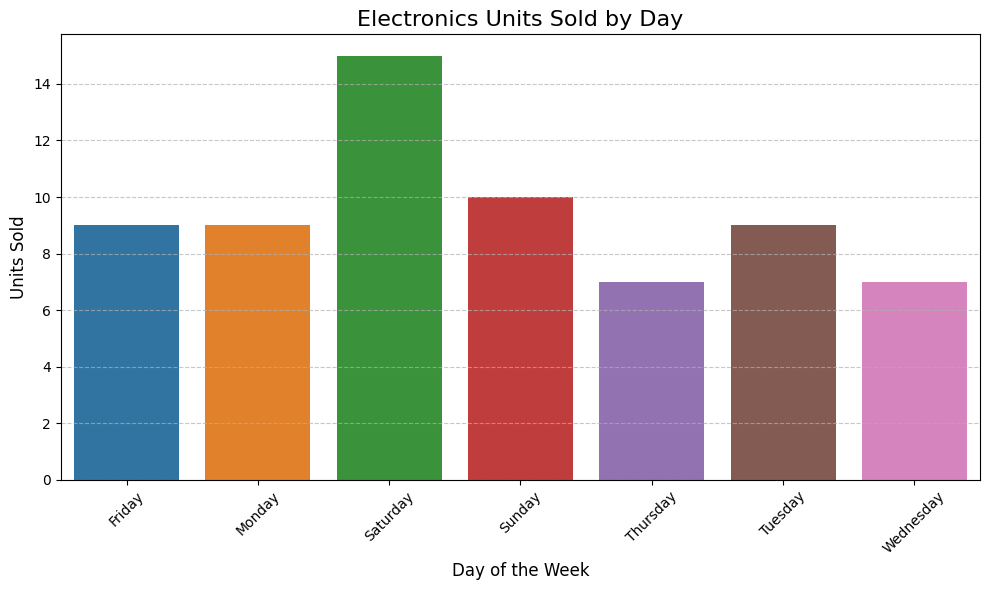

In [138]:
palette = sns.color_palette("tab10", len(electronics_units_sold_by_day))

plt.figure(figsize=(10, 6))
sns.barplot(
    data=electronics_units_sold_by_day, 
    x='day_name', 
    y='Units Sold', 
    hue='day_name', 
    dodge=False,    
    palette=palette,
    legend=False     
)

plt.title('Electronics Units Sold by Day', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [142]:
clothing_units_sold_by_day = clothing.groupby('day_name')['Units Sold'].sum().reset_index()
clothing_units_sold_by_day

day_name  Units Sold
0     Friday          20
1     Monday          21
2   Saturday          18
3     Sunday          26
4   Thursday          18
5    Tuesday          24
6  Wednesday          18

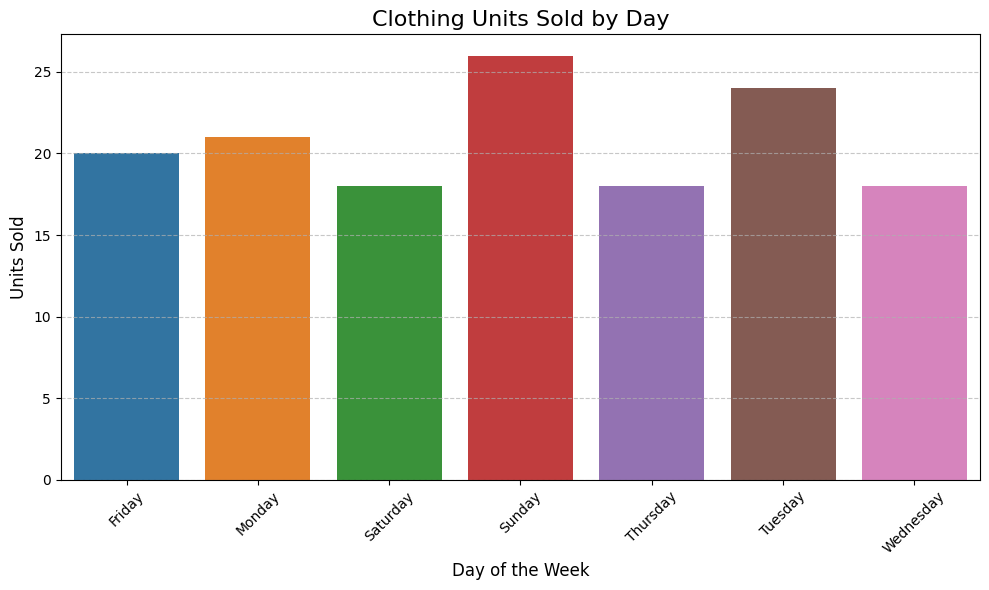

In [143]:
palette = sns.color_palette("tab10", len(clothing_units_sold_by_day))

plt.figure(figsize=(10, 6))
sns.barplot(
    data=clothing_units_sold_by_day, 
    x='day_name', 
    y='Units Sold', 
    hue='day_name',  
    dodge=False,    
    palette=palette,
    legend=False     
)

plt.title('Clothing Units Sold by Day', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [144]:
books = df[df["Product Category"]== "Books"]
books

Date Product Category  \
3   2024-01-04            Books   
9   2024-01-10            Books   
15  2024-01-16            Books   
21  2024-01-22            Books   
27  2024-01-28            Books   
33  2024-02-03            Books   
39  2024-02-09            Books   
45  2024-02-15            Books   
51  2024-02-21            Books   
57  2024-02-27            Books   
63  2024-03-04            Books   
69  2024-03-10            Books   
75  2024-03-16            Books   
81  2024-03-22            Books   
87  2024-03-28            Books   
93  2024-04-03            Books   
99  2024-04-09            Books   
105 2024-04-15            Books   
111 2024-04-21            Books   
117 2024-04-27            Books   
123 2024-05-03            Books   
129 2024-05-09            Books   
135 2024-05-15            Books   
141 2024-05-21            Books   
147 2024-05-27            Books   
153 2024-06-02            Books   
159 2024-06-08            Books   
165 2024-06-14            Books   
171 2024-06-20            Books   
177 2024-06-26            Books   
183 2024-07-02            Books   
189 2024-07-08            Books   
195 2024-07-14            Books   
201 2024-07-20            Books   
207 2024-07-26            Books   
213 2024-08-01            Books   
219 2024-08-07            Books   
225 2024-08-13            Books   
231 2024-08-19            Books   
237 2024-08-25            Books   

                                          Product Name  Units Sold  \
3                                    The Da Vinci Code           4   
9                                Dune by Frank Herbert           2   
15               Salt, Fat, Acid, Heat by Samin Nosrat           3   
21                          Gone Girl by Gillian Flynn           2   
27                  Pride and Prejudice by Jane Austen           3   
33                               1984 by George Orwell           4   
39               Harry Potter and the Sorcerer's Stone           3   
45                          Becoming by Michelle Obama           4   
51              The Silent Patient by Alex Michaelides           2   
57                           Educated by Tara Westover           3   
63              Where the Crawdads Sing by Delia Owens           4   
69             The Great Gatsby by F. Scott Fitzgerald           2   
75                 To Kill a Mockingbird by Harper Lee           4   
81                        The Hobbit by J.R.R. Tolkien           3   
87             The Catcher in the Rye by J.D. Salinger           4   
93                       The Alchemist by Paulo Coelho           3   
99                   The Power of Now by Eckhart Tolle           2   
105             The Girl on the Train by Paula Hawkins           4   
111  Sapiens: A Brief History of Humankind by Yuval...           2   
117                       Atomic Habits by James Clear           4   
123  The Subtle Art of Not Giving a F*ck by Mark Ma...           3   
129             The Four Agreements by Don Miguel Ruiz           2   
135               Think and Grow Rich by Napoleon Hill           3   
141               The Power of Habit by Charles Duhigg           2   
147                       The Outsiders by S.E. Hinton           3   
153               The Night Circus by Erin Morgenstern           2   
159                          The Art of War by Sun Tzu           3   
165                The Hunger Games by Suzanne Collins           4   
171   The Girl with the Dragon Tattoo by Stieg Larsson           2   
177             The Sun Also Rises by Ernest Hemingway           3   
183                           The Martian by Andy Weir           2   
189            The Catcher in the Rye by J.D. Salinger           3   
195                        The Road by Cormac McCarthy           2   
201                       The Goldfinch by Donna Tartt           2   
207                  The Great Alone by Kristin Hannah           3   
213   The Girl with the Dragon Tattoo by Stieg Larsson

In [146]:
books_by_day = books.groupby("day_name")["Units Sold"].sum().reset_index()
books_by_day

day_name  Units Sold
0     Friday          16
1     Monday          18
2   Saturday          17
3     Sunday          14
4   Thursday          19
5    Tuesday          15
6  Wednesday          15

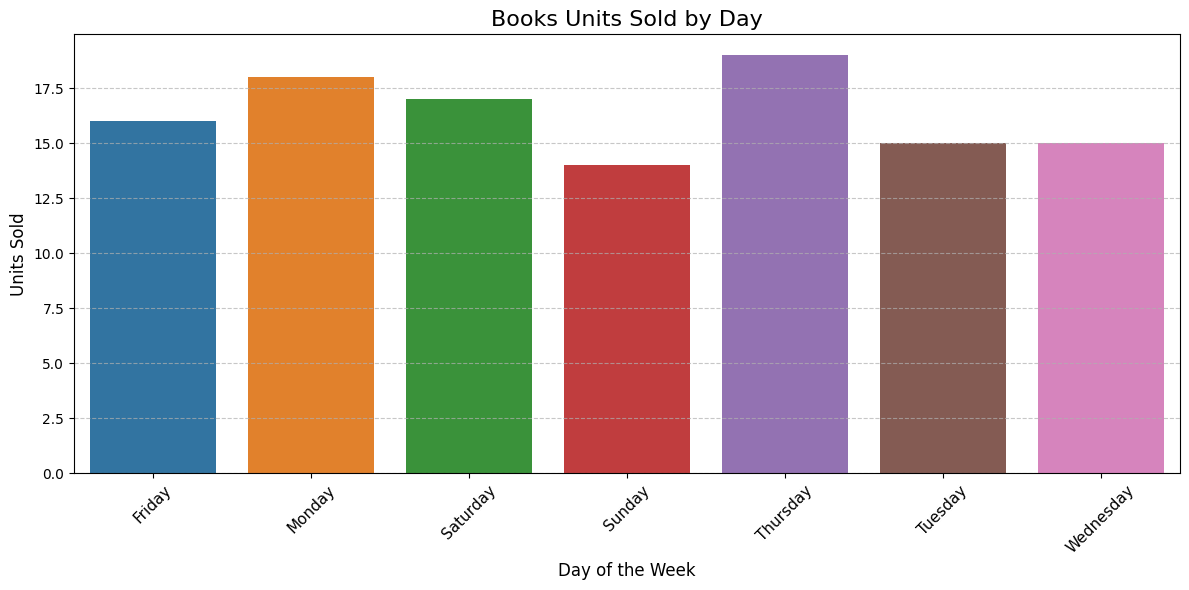

In [151]:
palette = sns.color_palette("tab10", len(books_by_day))

plt.figure(figsize=(12, 6))
sns.barplot(
    data=books_by_day, 
    x='day_name', 
    y='Units Sold', 
    hue='day_name',  
    dodge=False,    
    palette=palette,
    legend=False     
)

plt.title('Books Units Sold by Day', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [156]:
units_sold_by_month = df.groupby('month')["Units Sold"].sum().reset_index()
units_sold_by_month.set_index(['month'], inplace=True)
units_sold_by_month

Units Sold
month            
1              68
2              77
3              82
4              65
5              60
6              61
7              53
8              52

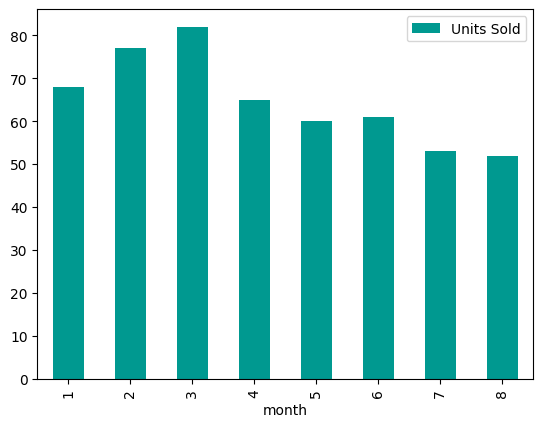

In [155]:
units_sold_by_month.plot(kind="bar",color=["#009990"]);

In [158]:
units_sold_by_day = df.groupby("day_name")["Units Sold"].sum().reset_index()
units_sold_by_day.set_index("day_name", inplace=True)
units_sold_by_day

Units Sold
day_name             
Friday             74
Monday             71
Saturday           84
Sunday             78
Thursday           70
Tuesday            76
Wednesday          65

<Axes: xlabel='day_name'>

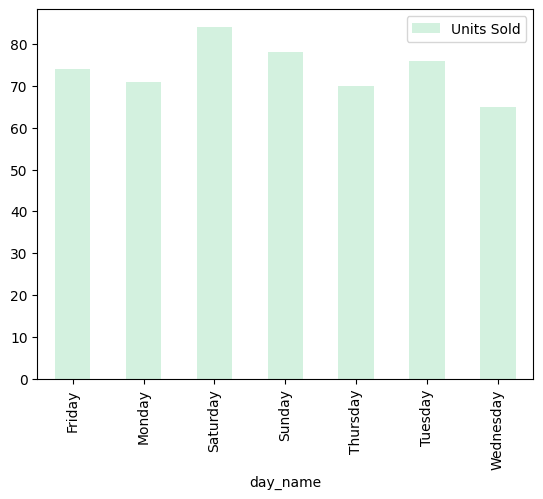

In [159]:
units_sold_by_day.plot(kind="bar", color="#D3F1DF")

In [160]:
df_grouped = df.groupby(['day_name',"Payment Method"])["Units Sold"].sum().reset_index()
df_grouped.set_index(['day_name', "Payment Method"], inplace=True)
df_grouped

Units Sold
day_name  Payment Method            
Friday    Credit Card             38
          Debit Card              20
          PayPal                  16
Monday    Credit Card             35
          Debit Card              21
          PayPal                  15
Saturday  Credit Card             51
          Debit Card              18
          PayPal                  15
Sunday    Credit Card             37
          Debit Card              26
          PayPal                  15
Thursday  Credit Card             37
          Debit Card              18
          PayPal                  15
Tuesday   Credit Card             36
          Debit Card              24
          PayPal                  16
Wednesday Credit Card             34
          Debit Card              18
          PayPal                  13

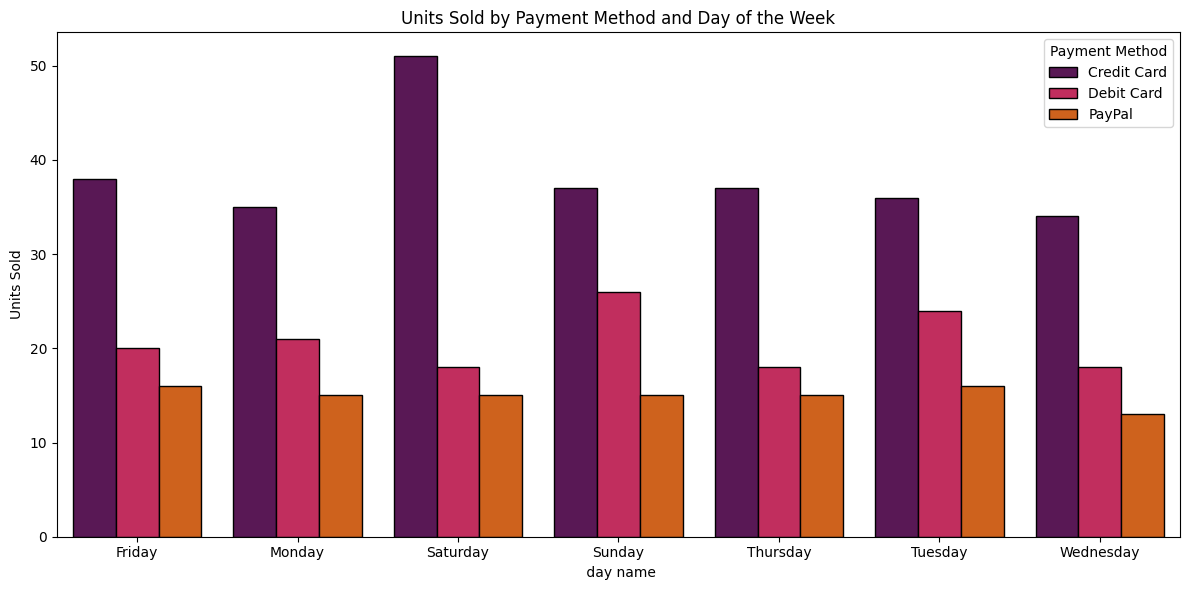

In [161]:
df_grouped = df.groupby(['day_name' ,"Payment Method"])["Units Sold"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='day_name', y='Units Sold', hue='Payment Method',palette=["#640D5F" , "#D91656","#EB5B00"],edgecolor="black")

plt.title('Units Sold by Payment Method and Day of the Week')
plt.xlabel(' day name')
plt.ylabel('Units Sold')
plt.legend(title='Payment Method')
plt.tight_layout() 


plt.show()

In [162]:
df_grouped = df.groupby(['month',"Payment Method"])["Units Sold"].sum().reset_index()
df_grouped.set_index(['month', "Payment Method"], inplace=True)
df_grouped

Units Sold
month Payment Method            
1     Credit Card             41
      Debit Card              16
      PayPal                  11
2     Credit Card             43
      Debit Card              19
      PayPal                  15
3     Credit Card             43
      Debit Card              24
      PayPal                  15
4     Credit Card             32
      Debit Card              20
      PayPal                  13
5     Credit Card             28
      Debit Card              17
      PayPal                  15
6     Credit Card             29
      Debit Card              19
      PayPal                  13
7     Credit Card             23
      Debit Card              18
      PayPal                  12
8     Credit Card             29
      Debit Card              12
      PayPal                  11

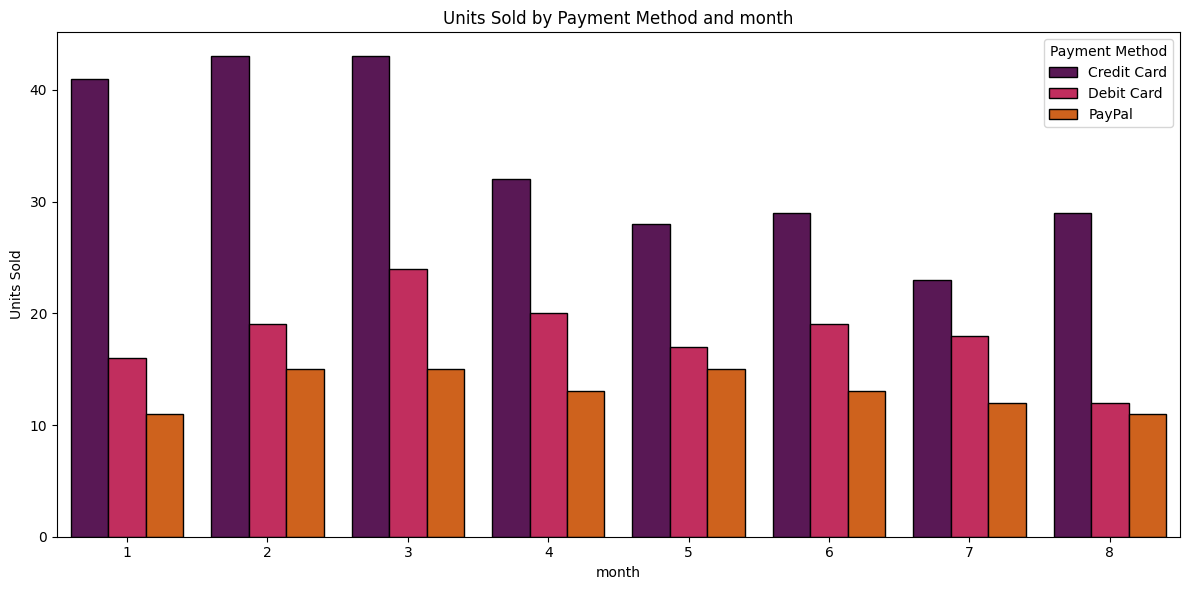

In [163]:
df_grouped = df.groupby(['month' ,"Payment Method"])["Units Sold"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='month', y='Units Sold', hue='Payment Method',palette=["#640D5F" , "#D91656","#EB5B00"],edgecolor="black")

plt.title('Units Sold by Payment Method and month')
plt.xlabel('month')
plt.ylabel('Units Sold')
plt.legend(title='Payment Method')
plt.tight_layout() 


plt.show()

In [164]:
df['Unit Price'].describe()

count     240.000000
mean      236.395583
std       429.446695
min         6.500000
25%        29.500000
50%        89.990000
75%       249.990000
max      3899.990000
Name: Unit Price, dtype: float64

In [165]:
df["Total Revenue"].describe()

count     240.000000
mean      335.699375
std       485.804469
min         6.500000
25%        62.965000
50%       179.970000
75%       399.225000
max      3899.990000
Name: Total Revenue, dtype: float64

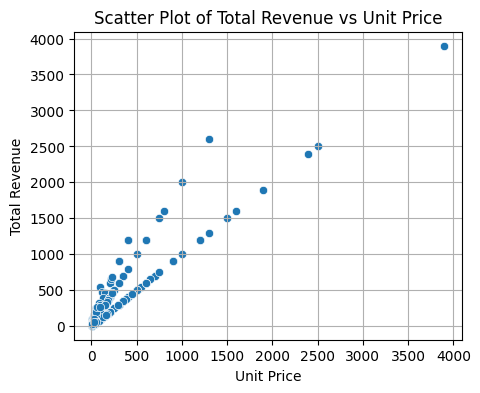

In [166]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Unit Price', y='Total Revenue', data=df)

plt.title('Scatter Plot of Total Revenue vs Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()